In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from utils_plotting import val_map, display_dict
from utils_scaling import fit, plot_contours

import jax.numpy as jnp

In [3]:
df = pd.read_csv("data/temp.csv")
df_big = pd.read_csv("data/extrapolation.csv")

In [4]:
def get_data(drop_df, key = "train/CrossEntropyLoss"):
    drop_df = drop_df.dropna(subset=[key])

    N = jnp.array(drop_df["params"], dtype=jnp.float32)
    D = jnp.array(drop_df["tokens"], dtype=jnp.float32)
    L = jnp.array(drop_df[key], dtype=jnp.float32)
    return N, D, L


In [5]:
formats = ["bfloat16", "fp4_e2m1", "float16", "fp16", "fp8_e5m2", "fp8_e4m3", "fp6_e3m2", "fp6_e2m3", "fp4", "int8", "int4"]
formats = ["bfloat16"]

w_format = bfloat16
Loss: 2.4628209066772448e-05
A = 106211762.16357815, B = 5160836501222543.0, E = 0.006817997620983904, alpha = 1.1247608229863661, beta = 0.0845323273531428
G = 1.603505951298131e+92, a = 0.06990226259812217, b = 0.9300977374018777


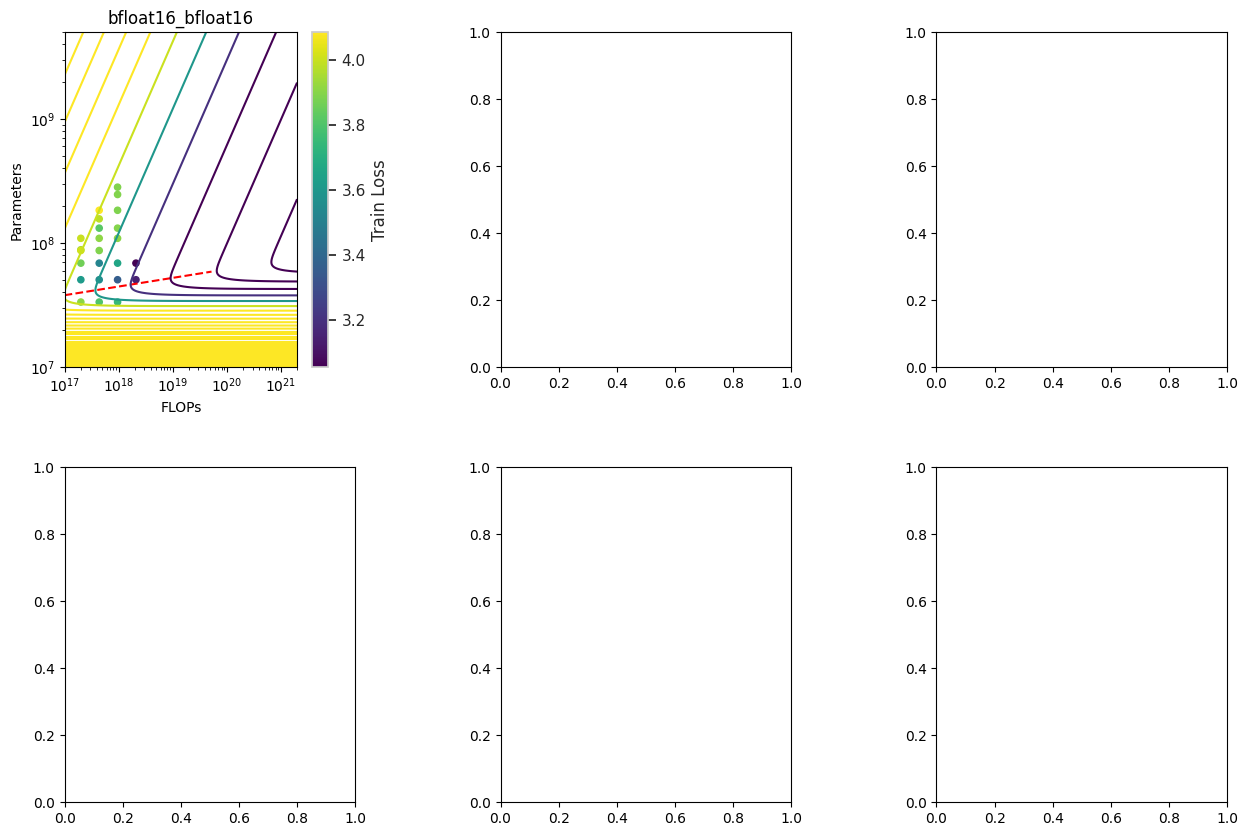

w_format = bfloat16
Loss: 3.452662980993257e-05
A = 921045030.2816945, B = 12.359989056423055, E = 0.9008564299084486, alpha = 1.3104235799295438, beta = 0.07040100684689912
G = 4175907.65265357, a = 0.05098475760143538, b = 0.9490152423985646


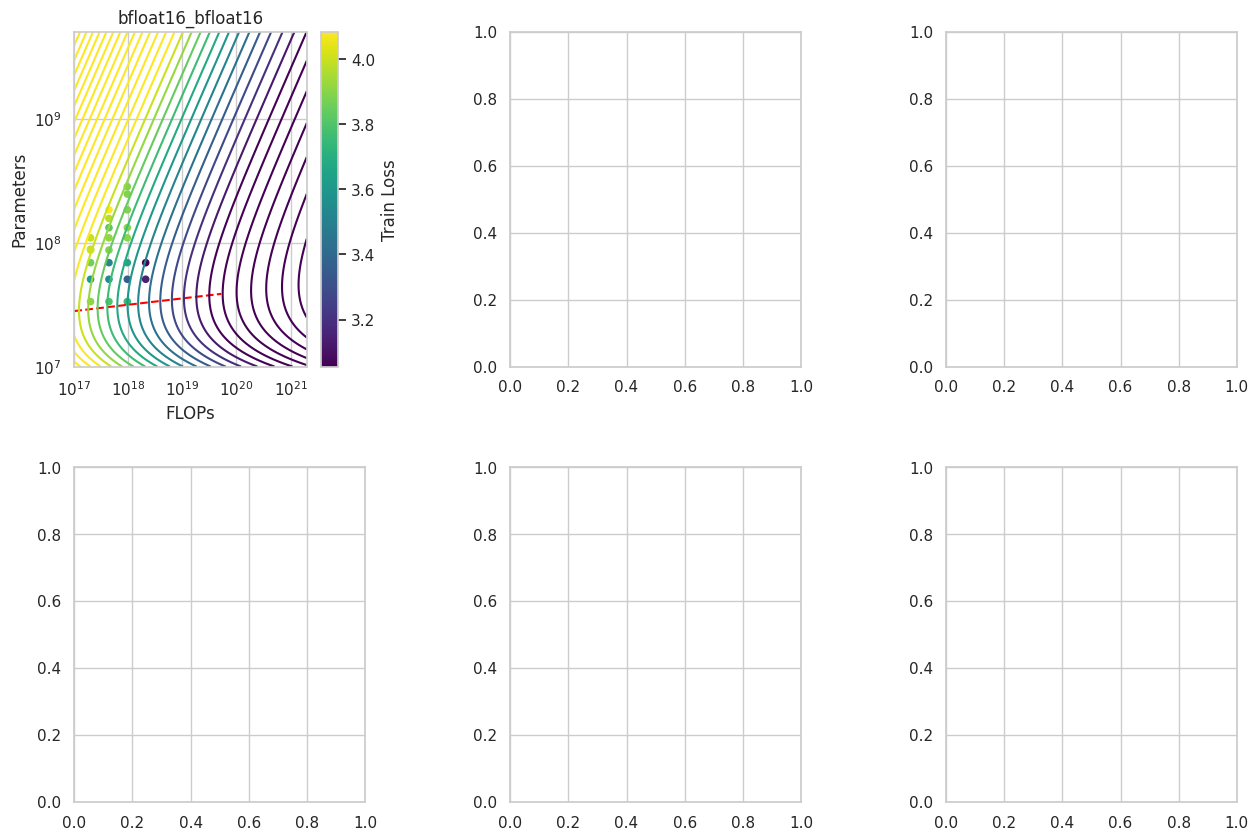

In [6]:
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, w_format in enumerate(formats):
        for i, a_format in enumerate(formats):
    # for i, data in enumerate(val_map.keys()):
            if w_format != a_format:
                continue
            
            for loss_name in ["val_loss"]:
                ax = axs[i]
                print(f"w_format = {w_format}")

                # drop_df = df[df["data"] == data]
                drop_df = df[(df["model.w_mx_format"] == w_format) & (df["model.a_mx_format"] == a_format)]

                N, D, L = get_data(drop_df, loss_name)

                params, _ = fit(N, D, L, kaplan=kaplan)
                print(f"Loss: {params['loss']}")

                # df_big_data = df_big[(df_big["model.w_mx_format"] == w_format) & (df_big["model.a_mx_format"] == a_format)]
                # x = np.array(df_big_data["iso_flop"])
                # y = np.array(df_big_data["params"])
                # z = np.array(df_big_data["val_loss"])
                # extrapolation = (x,y,z)
                extrapolation = None
                masks = np.ones(5)
                vals = np.zeros(5)
                plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
                # ax.set_title(f"{display_dict[data]}")
                ax.set_title(f"{w_format}_{a_format}")

                params["kaplan"] = kaplan
                params["w_format"] = w_format
                params["a_format"] = a_format
                # params["loss_name"] = val_map[data]
                params = pd.DataFrame([params.values], columns=params.index, index = [i])
                plot_params_df = pd.concat([plot_params_df, params])

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()

In [14]:
# latex tabel of params
for kaplan in [True, False]:
    for i, data in enumerate(val_map.keys()):
        a, b, e, alpha, beta = plot_params_df[(plot_params_df["data"] == data) & (plot_params_df["kaplan"] == kaplan)].values[0][:5]
        print(f"{display_dict[data]} & {a:.2e} & {b:.2e} & {e:.2f} & {alpha:.2f} & {beta:.2f} & {beta / (alpha + beta):.2f} \\\\")
    print()

KeyError: 'data'